In [1]:

# Importando as bibliotecas para os modelos
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report

# Modelos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import GridSearchCV
from googledrivedownloader import download_file_from_google_drive as gdd


# Plot dos gráficos
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns

# Hiperparâmetros

Alguns parâmetros de algortitmos de Machine Learning não são treinados, mas influenciam diretamente nas métricas do nosso modelo. Esses parâmetros são conhecidos como Hiperparâmetros.

Por exemplo na Arvore de Decisões temos o número de camadas no sklearn.

Uma forma de trabalhar com os hiperparâmetros é com o **Grid Search**, que é uma técnica de busca exaustiva para encontrar os melhores valores para os hiperparâmetros.


Para essa técnica vamos usar a validação cruzada, onde iremos encontrar os melhores parâmetros para o nosso modelo usando apenas o conjunto de treinamento. A imagem a seguir ilustra a divisão do conjunto de dados quando usamos a validação cruzada:



<center>
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="500">

fonte: https://scikit-learn.org/stable/modules/cross_validation.html

O objetivo do Grid Search é fazer uma busca para encontar os melhores hiperparâmetros do nosso moelo para posteriormente retreinar o modelo usando o resultado obtido por ele. A imagem a seguir ilustra esse processo:




<center>
<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" width="500">

fonte: https://scikit-learn.org/stable/modules/cross_validation.html

Vamos fazer um exemplo com um conjunto de dados para classificação com o objetivo de verificar os conceitos de hiperparâmetros:

## Exemplo Regressão

Vamos agora ver um exemplo com modelos de regressão

### Análise Exploratória dos Dados

#### Tarefa #1: Recebendo os dados

In [2]:
data_google_id = '1UNTyyCP5u4WVtjHNZI1smnaXJLlpm9an'
gdd(file_id=data_google_id,
   dest_path = './data_regressao.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
   showsize = True,
   overwrite=True)

# Armazenandos os dados em um DataFrame
dados_reg = pd.read_csv("data_regressao.csv")

32.0 KiB Done.


#### Tarefa #2: Analise Exploratória dos Dados

In [3]:
dados_reg.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
dados_reg.shape

(1030, 9)

In [5]:
dados_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [6]:
dados_reg.isnull().sum()

,0
Cement (component 1)(kg in a m^3 mixture),0
Blast Furnace Slag (component 2)(kg in a m^3 mixture),0
Fly Ash (component 3)(kg in a m^3 mixture),0
Water (component 4)(kg in a m^3 mixture),0
Superplasticizer (component 5)(kg in a m^3 mixture),0
Coarse Aggregate (component 6)(kg in a m^3 mixture),0
Fine Aggregate (component 7)(kg in a m^3 mixture),0
Age (day),0
"Concrete compressive strength(MPa, megapascals)",0


In [7]:
dados_reg.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


array([[<Axes: title={'center': 'Cement (component 1)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Fly Ash (component 3)(kg in a m^3 mixture)'}>],
       [<Axes: title={'center': 'Water  (component 4)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Superplasticizer (component 5)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)'}>],
       [<Axes: title={'center': 'Fine Aggregate (component 7)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Age (day)'}>,
        <Axes: title={'center': 'Concrete compressive strength(MPa, megapascals) '}>]],
      dtype=object)

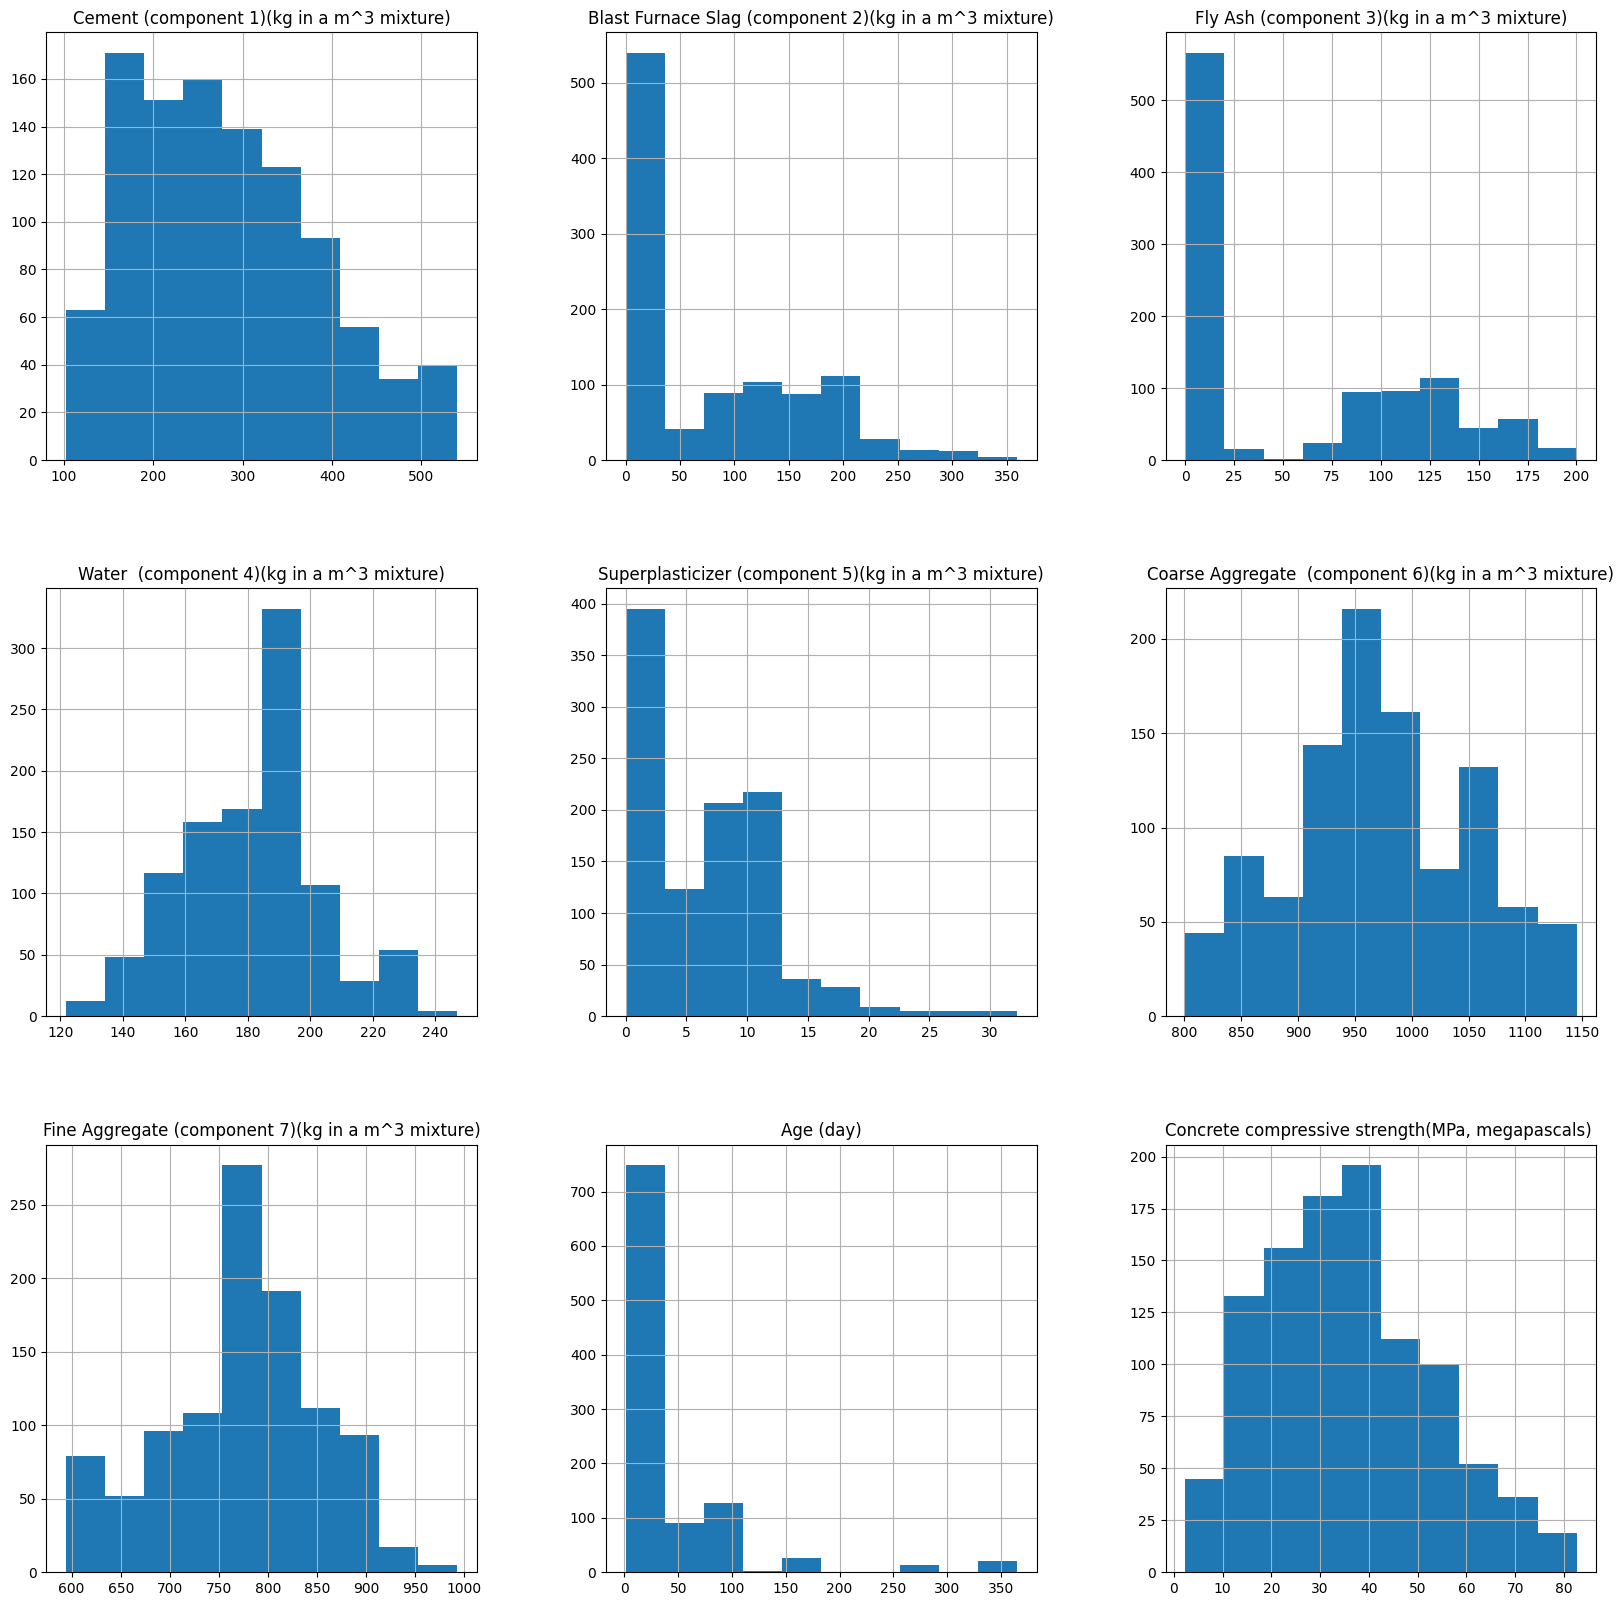

In [8]:
dados_reg.hist(figsize=(20,20))

### Aplicando IA aos nossos dados

#### Tarefa #1: Dividindo o conjunto de dados (Entrada/Saída e Treinamento/Teste)

In [9]:
dados_reg.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [10]:
# Dividindo X e y (Entrada e saída de dados)
X = dados_reg.drop(columns=["Concrete compressive strength(MPa, megapascals) "]) #Excluindo a coluna de charges do conjunto de dados
y = dados_reg["Concrete compressive strength(MPa, megapascals) "] # Em y colocamos apenas os valores que desejamos para a saída dos dados.

# Dividindo dados para treino e dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, # 30% dos dados serão utilizados no conjunto de teste.
                                                    random_state= 42 # Modelo de divisão número 42
                                                    )

scale = MinMaxScaler().fit(X_train)

X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

#### Tarefa #2.1: Hiperparâmetros dos modelos:

Árvore de Decisões para os modelos de Regressão:

In [27]:
modelo = DecisionTreeRegressor()
parametros = {'max_depth':range(2,21), 'min_samples_leaf' : range(2,10)}

modelo_GS = GridSearchCV(modelo,parametros)
modelo_GS.fit(X_train,y_train)
modelo_GS.best_params_


ValueError: 
All the 760 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
760 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/tree/_classes.py", line 1404, in fit
    super()._fit(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/tree/_classes.py", line 318, in _fit
    y = np.ascontiguousarray(y, dtype=DOUBLE)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Iris-versicolor'


Modelo de Random Forest Regressor:

Modelo de Gradient Boosting Regressor:

#### Tarefa #2.2: Treinando os modelos:

In [11]:
modelos = {}
previsoes = {}
for nome_modelo, modelo in modelos.items():
  regressor = modelo
  modelo.fit(X_train,y_train)
  previsoes[nome_modelo]=modelo.predict(X_test)

#### Tarefa #3: Métricas de desempenho dos modelos

In [12]:
for nome_reg, prev in previsoes.items():
  print('='*30)
  print(f"{nome_reg:^30}")
  mse = mean_squared_error(y_true=y_test,
                           y_pred=prev)
  mae = mean_absolute_error(y_true=y_test,
                            y_pred=prev)
  r2 = r2_score(y_true=y_test,
                y_pred=prev)
  print(f"MSE = {mse}")
  print(f"MAE = {mae}")
  print(f"R2 = {r2}")

# Exemplo Classificadores

### Tarefa #1: Recebendo os dados

In [13]:
data_google_id = '1Q1_W0UF4F6pOhNGHAxhC0YRKwvizZgRt'
gdd(file_id=data_google_id,
    dest_path = './data_classificacao.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
    showsize = True,
    overwrite = True)

# Armazenandos os dados em um DataFrame
dados_classificacao = pd.read_csv("data_classificacao.csv", sep = ',')

0.0 B Done.


### Tarefa #2: Analise Exploratória dos Dados

In [14]:
dados_classificacao.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
dados_classificacao.shape

(150, 6)

In [16]:
dados_classificacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [17]:
dados_classificacao.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [18]:
dados_classificacao.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Tarefa#3: Tratamento dos dados

In [19]:
dados_classificacao.drop(columns=['Id'], inplace = True)

## Aplicando IA aos nossos dados

### Tarefa #1: Dividindo o conjunto de dados (Entrada/Saída e Treinamento/Teste)

In [20]:
# Dividindo X e y (Entrada e saída de dados)
X = dados_classificacao.drop(columns=['Species']) #Excluindo a coluna de charges do conjunto de dados
y = dados_classificacao["Species"] # Em y colocamos apenas os valores que desejamos para a saída dos dados.

# Dividindo dados para treino e dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, # 30% dos dados serão utilizados no conjunto de teste.
                                                    random_state= 42 # Modelo de divisão número 42
                                                    )

### Tarefa #2.1: Hiperparâmetros dos modelos

Vamos começar com o k-NN:

Árvore de Decisões:

Random Forest:

Gradient Boosting Classifier:




Support Vector Machine:

### Tarefa #2.2: Treinando os modelos

In [21]:
modelos = {}
y_pred = {}
for nome_modelo, modelo in modelos.items():
  # Treinar o modelo:
  modelo.fit(X_train, y_train)
  y_pred[nome_modelo] = modelo.predict(X_test)

## Tarefa #3: Métricas de desempenho do modelo

In [22]:
figure = plt.figure(figsize=(25,10))
for i, (nome_modelo, y_p) in enumerate(y_pred.items()):
  cm = confusion_matrix(y_true=y_test,
                        y_pred=y_p,
                        labels=y_train.unique())
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=y_train.unique())
  ax = plt.subplot(2,3,i+1)
  disp.plot(ax=ax)
  ax.set_title(nome_modelo)

<Figure size 2500x1000 with 0 Axes>

In [23]:
for nome_modelo, y_p in y_pred.items():
  print(f"Métricas do modelo: {nome_modelo}")
  print(classification_report(y_true=y_test,
                              y_pred=y_p))
  print('-'*53)